Downloading and Importing Necessary Libraries:

In [1]:
!pip install fastai==0.7.0

     |████████████████████████████████| 122kB 2.8MB/s 
     |████████████████████████████████| 496.4MB 15kB/s 
     |████████████████████████████████| 1.5MB 43.7MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2659316 sha256=77988c344f0892b1185327e3fd7f7054fd498323a3874f70b5f4b876a02d0d2d
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.6.1+cu101 has requirement torch==1.5.1, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
!pip install pandas_summary

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.impute import SimpleImputer 

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from IPython.display import display
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# Data Preparation:
Loading data:

In [6]:
trip=pd.read_csv('/content/trip.csv')
station=pd.read_csv('/content/station.csv')
weather=pd.read_csv('/content/weather.csv')

In [7]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  669959 non-null  int64 
 1   duration            669959 non-null  int64 
 2   start_date          669959 non-null  object
 3   start_station_name  669959 non-null  object
 4   start_station_id    669959 non-null  int64 
 5   end_date            669959 non-null  object
 6   end_station_name    669959 non-null  object
 7   end_station_id      669959 non-null  int64 
 8   bike_id             669959 non-null  int64 
 9   subscription_type   669959 non-null  object
 10  zip_code            663340 non-null  object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


Create a column called "date", so that we can join with weather table

In [8]:
trip['start_date']=pd.to_datetime(trip['start_date'])

In [9]:
trip['date'] = [d.date() for d in trip['start_date']]

In [10]:
trip['date']=pd.to_datetime(trip['date'])

In [11]:
trip.head(2)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013-08-29


In [12]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  669959 non-null  int64         
 1   duration            669959 non-null  int64         
 2   start_date          669959 non-null  datetime64[ns]
 3   start_station_name  669959 non-null  object        
 4   start_station_id    669959 non-null  int64         
 5   end_date            669959 non-null  object        
 6   end_station_name    669959 non-null  object        
 7   end_station_id      669959 non-null  int64         
 8   bike_id             669959 non-null  int64         
 9   subscription_type   669959 non-null  object        
 10  zip_code            663340 non-null  object        
 11  date                669959 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 61.3+ MB


In [13]:
trip.shape

(669959, 12)

In [14]:
station.head(2)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013


In [15]:
station['start_station_id']=station['id']

In [16]:
weather['date']=pd.to_datetime(weather['date'])

In [17]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            3665 non-null   datetime64[ns]
 1   max_temperature_f               3661 non-null   float64       
 2   mean_temperature_f              3661 non-null   float64       
 3   min_temperature_f               3661 non-null   float64       
 4   max_dew_point_f                 3611 non-null   float64       
 5   mean_dew_point_f                3611 non-null   float64       
 6   min_dew_point_f                 3611 non-null   float64       
 7   max_humidity                    3611 non-null   float64       
 8   mean_humidity                   3611 non-null   float64       
 9   min_humidity                    3611 non-null   float64       
 10  max_sea_level_pressure_inches   3664 non-null   float64       
 11  mean

In [18]:
weather.shape

(3665, 24)

In [19]:
weather['zip_code']=weather['zip_code'].astype(str)

In [20]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            3665 non-null   datetime64[ns]
 1   max_temperature_f               3661 non-null   float64       
 2   mean_temperature_f              3661 non-null   float64       
 3   min_temperature_f               3661 non-null   float64       
 4   max_dew_point_f                 3611 non-null   float64       
 5   mean_dew_point_f                3611 non-null   float64       
 6   min_dew_point_f                 3611 non-null   float64       
 7   max_humidity                    3611 non-null   float64       
 8   mean_humidity                   3611 non-null   float64       
 9   min_humidity                    3611 non-null   float64       
 10  max_sea_level_pressure_inches   3664 non-null   float64       
 11  mean

In [21]:
weather.head(2)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,30.05,30.00,29.93,10.0,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107


Merging Trip and Weather tables based on date:


In [22]:
df = pd.merge(trip, weather,  how='left', left_on=['zip_code','date'], right_on = ['zip_code','date'])

In [23]:
df.shape

(669959, 34)

Missing Values:

In [24]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
events,651422,0.972331
max_gust_speed_mph,580271,0.866129
mean_dew_point_f,574873,0.858072
mean_humidity,574873,0.858072
max_dew_point_f,574873,0.858072
min_dew_point_f,574873,0.858072
max_humidity,574873,0.858072
min_humidity,574873,0.858072
min_visibility_miles,574745,0.857881
mean_visibility_miles,574745,0.857881


In [25]:
df=df.drop(['events'],axis=1)
df=df.drop(['date'],axis=1)

Dropping NA Values

In [26]:
df=df.dropna()

In [27]:
df.shape

(89630, 32)

In [28]:
df.isnull().sum()

id                                0
duration                          0
start_date                        0
start_station_name                0
start_station_id                  0
end_date                          0
end_station_name                  0
end_station_id                    0
bike_id                           0
subscription_type                 0
zip_code                          0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph         

Merge new DF with station to get docker count and City

In [29]:
df = pd.merge(df, station,  how='left', left_on=['start_station_id'], right_on = ['start_station_id'])

In [30]:
df.shape

(89630, 39)

In [31]:
df['date'] = pd.to_datetime(df['start_date']).dt.date
df['time'] = pd.to_datetime(df['start_date']).dt.time

In [32]:
df.shape

(89630, 41)

Converting date into separate columns:

In [33]:
add_datepart(df,'date')

In [34]:
df['hour'] = df.start_date.dt.hour
df['minute'] = df.start_date.dt.minute

In [35]:
df.head().T

,0,1,2,3,4
id_x,4965,4917,4721,4812,4705
duration,129,169,184,186,193
start_date,2013-08-29 19:32:00,2013-08-29 18:45:00,2013-08-29 16:27:00,2013-08-29 17:30:00,2013-08-29 16:15:00
start_station_name,Mountain View Caltrain Station,Redwood City Medical Center,Market at 10th,2nd at Folsom,Golden Gate at Polk
start_station_id,28,26,67,62,59
end_date,8/29/2013 19:35,8/29/2013 18:48,8/29/2013 16:30,8/29/2013 17:33,8/29/2013 16:18
end_station_name,Mountain View Caltrain Station,Broadway at Main,South Van Ness at Market,2nd at Folsom,San Francisco City Hall
end_station_id,28,25,66,62,58
bike_id,140,229,416,409,519
subscription_type,Subscriber,Subscriber,Subscriber,Subscriber,Subscriber


In [36]:
df.columns

Index(['id_x', 'duration', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'subscription_type', 'zip_code', 'max_temperature_f',
       'mean_temperature_f', 'min_temperature_f', 'max_dew_point_f',
       'mean_dew_point_f', 'min_dew_point_f', 'max_humidity', 'mean_humidity',
       'min_humidity', 'max_sea_level_pressure_inches',
       'mean_sea_level_pressure_inches', 'min_sea_level_pressure_inches',
       'max_visibility_miles', 'mean_visibility_miles', 'min_visibility_miles',
       'max_wind_Speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph',
       'precipitation_inches', 'cloud_cover', 'wind_dir_degrees', 'id_y',
       'name', 'lat', 'long', 'dock_count', 'city', 'installation_date',
       'time', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Elapsed', 'hour',

Droping unnecessary features:

In [37]:
df=df.drop(['id_x', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'zip_code', 'time','id_y','Elapsed','precipitation_inches',
       'name', 'lat', 'long', 'installation_date'],axis=1)

# Data Analysis:

Outliers

The number of the 0,1% top values of Duration is 89 and they have duration higher than 579 mins


Text(0.5, 1.0, 'Bike Share Duration Distribution')

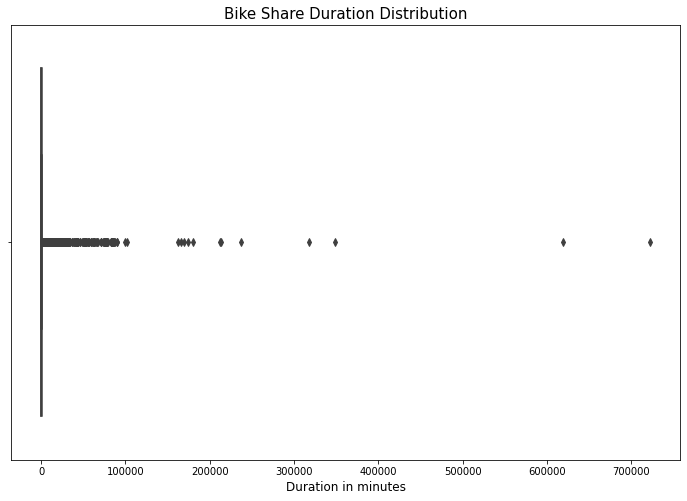

In [38]:
# Find outliers
sorted_duration = df.sort_values('duration',ascending=False)
print("The number of the 0,1% top values of Duration is",
      len(sorted_duration.head(len(sorted_duration)//1000)),"and they have duration higher than",
      sorted_duration.duration[19], "mins")

# boxplot appliances
plt.figure(figsize=(12,8))
sns.boxplot(x="duration", data=df)
plt.xlabel('Duration in minutes', fontsize=12)
plt.title("Bike Share Duration Distribution", fontsize=15)

In [39]:
# Outliers removal
df = df.drop(df[(df.duration>579)|(df.duration<0)].index)

In [40]:
df.shape

(60552, 38)

Distribution of Duration:

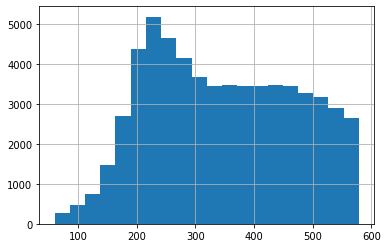

In [41]:
df['duration'].hist(bins = 20 ) ;

In [42]:
df.duration.describe()

count    60552.000000
mean       346.804565
std        124.281730
min         60.000000
25%        241.000000
50%        339.000000
75%        452.000000
max        579.000000
Name: duration, dtype: float64

Summary:

In [43]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [44]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
duration,60552,NaN,NaN,NaN,346.805,124.282,60,241,339,452,579
subscription_type,60552,2,Subscriber,59790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_temperature_f,60552,NaN,NaN,NaN,68.9616,7.38527,46,64,68,73,102
mean_temperature_f,60552,NaN,NaN,NaN,60.5802,6.23403,38,56,60,66,82
min_temperature_f,60552,NaN,NaN,NaN,51.7886,6.51232,25,47,52,57,68
max_dew_point_f,60552,NaN,NaN,NaN,52.5802,5.66265,20,49,53,57,66
mean_dew_point_f,60552,NaN,NaN,NaN,48.92,6.7533,13,46,49,54,64
min_dew_point_f,60552,NaN,NaN,NaN,44.8737,8.45752,2,41,46,52,63
max_humidity,60552,NaN,NaN,NaN,85.9344,8.58617,30,83,86,93,100
mean_humidity,60552,NaN,NaN,NaN,68.3957,10.1626,25,64,69,74,95


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60552 entries, 0 to 89629
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   duration                        60552 non-null  int64  
 1   subscription_type               60552 non-null  object 
 2   max_temperature_f               60552 non-null  float64
 3   mean_temperature_f              60552 non-null  float64
 4   min_temperature_f               60552 non-null  float64
 5   max_dew_point_f                 60552 non-null  float64
 6   mean_dew_point_f                60552 non-null  float64
 7   min_dew_point_f                 60552 non-null  float64
 8   max_humidity                    60552 non-null  float64
 9   mean_humidity                   60552 non-null  float64
 10  min_humidity                    60552 non-null  float64
 11  max_sea_level_pressure_inches   60552 non-null  float64
 12  mean_sea_level_pressure_inches  

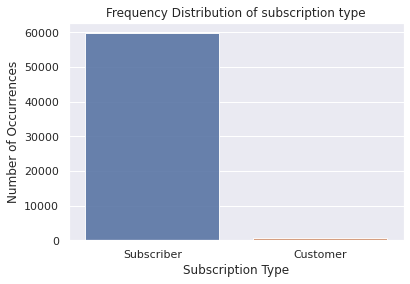

Subscriber    59790
Customer        762
Name: subscription_type, dtype: int64


Subscriber    0.987416
Customer      0.012584
Name: subscription_type, dtype: float64

In [46]:
class_count1 = df['subscription_type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(class_count1.index, class_count1.values, alpha=0.9)
plt.title('Frequency Distribution of subscription type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Subscription Type', fontsize=12)
plt.show()
print(df['subscription_type'].value_counts())
df.subscription_type.value_counts(normalize=True)

Categorical and Boolean features:


In [47]:
categorical = df.select_dtypes(include=['object', 'bool']).columns

In [48]:
categorical

Index(['subscription_type', 'city', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'],
      dtype='object')

In [49]:
for col in categorical:
    
    print(np.unique(df[col]))
# transform the categorical columns
df = pd.get_dummies(df, columns=categorical)

['Customer' 'Subscriber']
['Mountain View' 'Palo Alto' 'Redwood City' 'San Francisco' 'San Jose']
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]


In [50]:
df.shape

(60552, 49)

In [77]:
df.to_csv("bike_share.csv",index = False, sep=',')

# Feature Preprocessing

In [51]:
#target=['duration']
y=df[['duration']]
y.shape

(60552, 1)

In [52]:
x=df.drop(['duration'],axis=1)
x.shape

(60552, 48)

In [53]:
import random
random.seed(49)

In [54]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler() 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  
# To scale data 
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train1 = scaler.fit_transform(y_train)
y_test1=scaler.transform(y_test)
print("Feature space holds %d observations and %d features" % X_train.shape)

Feature space holds 48441 observations and 48 features


In [56]:
X_train.shape,X_train.shape,y_train.shape,y_test.shape

((48441, 48), (48441, 48), (48441, 1), (12111, 1))

# Cost Function


In [57]:
def costfunction(x,y, theta):
    m = len(x)
    #costvalue = np.sum(((dataFile.dot(coeffMatrix.T)) - dataTarget) ** 2) / (2 * dataLength);
    return np.sum(((x.dot(theta.T)) - y) ** 2) / (2 * m)

# Gradient Desent Function

In [58]:
def Gradient_Descent(x,y,theta,alpha,iterations):
  m=len(y)
  cost=[0]*iterations
  for i in range(iterations):
    loss=x.dot(theta.T)-y                 #predicted - Actual
    grad=x.T.dot(loss)/m                  #loss*x
    theta=theta-(alpha*grad.T)            #theta=old_theta-alpha*grad  
    costvalue=costfunction(x,y, theta)    
    cost[i]=costvalue
  #print('Model Coefficients: ')
  #print(theta)
  return theta, cost

# Linear Regression Function:

In [59]:
def model(x, y):
    alpha=[0.0065];
    m=len(x)
    for learning_rate in alpha:
        theta =np.zeros((1, x.shape[1]))
        theta, cost = Gradient_Descent(x, y, theta, learning_rate, 20000);
    return theta;

In [60]:
m=model(X_train,y_train1)

In [61]:
m

array([[ 0.02123,  0.01885,  0.02436,  0.00125,  0.00251,  0.01454,  0.01877, -0.00101, -0.00916,  0.00211,
         0.00533, -0.00043,  0.01973,  0.00962,  0.01235,  0.00919,  0.01208,  0.02372, -0.01515,  0.00674,
         0.10571, -0.01554,  0.01366, -0.01414,  0.00719, -0.00681,  0.01283,  0.01219,  0.0004 ,  0.0943 ,
        -0.01236, -0.02785, -0.0413 , -0.02976,  0.11574,  0.0651 ,  0.04123,  0.0407 ,  0.04388,  0.03806,
         0.04975,  0.03218,  0.04605,  0.03588,  0.06288,  0.01906,  0.07811,  0.00383]])

In [62]:
#Predict

def predict(testData, theta):
    y_pred = testData.dot(theta.T);
    return y_pred;

In [63]:
def calculateRMSE(testTarget, y_pred):
    modelRMSE =np.sqrt(np.sum((testTarget - y_pred) ** 2) / len(testTarget))
    return modelRMSE;

In [64]:
y_pred=predict(X_test,m)

In [65]:
y_pred_org=scaler.inverse_transform(y_pred)

In [66]:
rmse=calculateRMSE(y_test,y_pred_org)
rmse

duration    121.404696
dtype: float64

In [67]:
y_pred_org[-3]

array([356.06948])

In [68]:
y_test

,duration
41785,370
21124,574
6080,552
66720,317
82795,232
...,...
57468,83
82405,433
59572,395
38895,68


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
regressor.coef_

array([[  63.05079, -110.14712,   83.74147,    6.84697,  -38.07521,   46.9941 ,  -20.89542,   45.49923,
         -41.8085 , -110.39839,  200.08477, -102.9511 ,   15.86612,  -27.15545,    8.52975,  -18.076  ,
          -4.12751,   22.54964,  -10.27869,    2.39815,   54.10438,   -8.47703,  474.01572,  -19.40734,
          46.00947,   -4.40556, -491.67926,    5.24893,   -0.31751,   31.58694,  -31.58694,  -19.20639,
         -33.14965,  -32.16514,   55.46777,   29.05341,    1.28962,   -1.28962,    2.14026,   -2.14026,
           2.92989,   -2.92989,   -0.75551,    0.75551,   -1.34152,    1.34152,    6.11089,   -6.11089]])

In [71]:
y_pred1 = regressor.predict(X_test)

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 103.10345072458158
Mean Squared Error: 14701.869311939025
Root Mean Squared Error: 121.25126519727134


In [73]:
y_pred1[3]

array([365.7357])

In [74]:
y_test[0:3]

,duration
41785,370
21124,574
6080,552


#Important Features

In [75]:
corelation=df[df.columns[:]].corr()['duration'][:]

In [76]:
corelation

duration                          1.000000
max_temperature_f                 0.031219
mean_temperature_f                0.039453
min_temperature_f                 0.040159
max_dew_point_f                   0.027952
mean_dew_point_f                  0.027398
min_dew_point_f                   0.027519
max_humidity                     -0.014400
mean_humidity                    -0.010232
min_humidity                     -0.004323
max_sea_level_pressure_inches    -0.030521
mean_sea_level_pressure_inches   -0.027353
min_sea_level_pressure_inches    -0.026247
max_visibility_miles             -0.002993
mean_visibility_miles             0.014174
min_visibility_miles              0.017761
max_wind_Speed_mph                0.025204
mean_wind_speed_mph               0.030932
max_gust_speed_mph                0.031491
cloud_cover                      -0.009962
wind_dir_degrees                  0.012012
dock_count                        0.137371
Year                             -0.032536
Month      